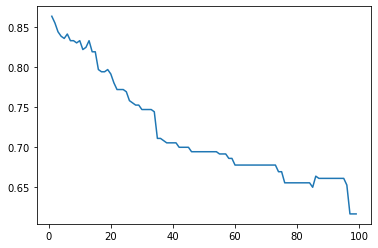

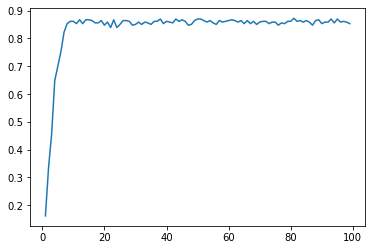

In [1]:
import cv2
import numpy as np
import sklearn
from sklearn import datasets
import sklearn.model_selection
from sklearn import tree
import matplotlib.pyplot as plt

digits = datasets.load_digits()
dtree = tree.DecisionTreeClassifier()
dir(digits)
data ,feature_names,target = digits.data,digits.feature_names,digits.target
target_names = digits.target_names
xTrain,xTest,yTrain,yTest = sklearn.model_selection.train_test_split(data,target,test_size=0.2,random_state=7)

max_depths = np.arange(1,100,1)
best_depth_score = []
for index,data in enumerate(max_depths):
    dtree = tree.DecisionTreeClassifier(max_depth=data)
    dtree.fit(xTrain,yTrain)
    score = dtree.score(xTest,yTest)
    best_depth_score.append(score)


min_samples_leaf  = np.arange(1,100,1)
best_min_samples_score = []
for index,data in enumerate(min_samples_leaf):
    dtree = tree.DecisionTreeClassifier(min_samples_leaf=data)
    dtree.fit(xTrain,yTrain)
    score = dtree.score(xTest,yTest)
    best_min_samples_score.append(score)


plt.plot(max_depths,best_min_samples_score)
plt.show()
plt.plot(max_depths,best_depth_score)
plt.show()


In [49]:
dir(digits)
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

获取numpy 中最大元素的下标

In [38]:
best_depth = (np.array(best_depth_score).argmax(),np.array(best_depth_score).max())
best_min_samples = (np.array(best_min_samples_score).argmax(),np.array(best_min_samples_score).max())


In [50]:
best_dtree = tree.DecisionTreeClassifier(max_depth=best_depth[0],min_samples_leaf=1)
best_dtree.fit(xTrain,yTrain)
print(best_depth[1],best_min_samples[1],best_dtree.score(xTest,yTest))
with open('Dot/bestDot/digit_dtree.dot','w') as f:
    tree.export_graphviz(best_dtree,f,feature_names = feature_names,class_names = str(target_names))

0.875 0.8611111111111112 0.8555555555555555
